- https://www.basketball-reference.com/about/factors.html
- https://www.sportsanalyticslab.com/column/four-factors.html
- https://www.sportsanalyticslab.com/column/basketball-mathematics.html

In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import plotly

from src.const import EventData, GameData, GameBoxScoreData, GameSummaryData, TeamData
from src.data import load
from src.preprocess import aggregate, join_data
from src.utils import preprocess_game_summary, FourFactors
from src.visualize import BarPlotly

print(plotly.__version__)

4.13.0


In [3]:
df_game = load(GameData.games_202021)
display(df_game.head().T)

,0,1,2,3,4
ScheduleKey,5938,5939,5890,5903,5891
Season,2020-21,2020-21,2020-21,2020-21,2020-21
EventId,2,2,2,2,2
Date,2020.10.24,2020.10.25,2020.10.09,2020.10.18,2020.10.10
Arena,おおきにアリーナ舞洲,おおきにアリーナ舞洲,広島サンプラザホール,横浜国際プール,広島サンプラザホール
Attendance,1675,1255,2061,1517,2221
HomeTeamId,700,700,721,694,721
AwayTeamId,706,706,706,706,706


In [4]:
df_team = load(TeamData.teams)
df_team = df_team[(df_team["Season"]=="2020-21") & (df_team["League"]=="B1")]
display(df_team.head().T)

,144,145,146,147,148
TeamId,702,693,703,704,706
Season,2020-21,2020-21,2020-21,2020-21,2020-21
League,B1,B1,B1,B1,B1
NameShort,北海道,秋田,宇都宮,千葉,A東京
NameLong,レバンガ北海道,秋田ノーザンハピネッツ,宇都宮ブレックス,千葉ジェッツ,アルバルク東京
Division,東地区,東地区,東地区,東地区,東地区


In [5]:
df_game_box = load(GameBoxScoreData.games_boxscore_202021)
df_bame_box = df_game_box[df_game_box["ScheduleKey"]<=6003]

df_game_summary = load(GameSummaryData.games_summary_202021)
df_game_summary = df_game_summary[df_game_summary["ScheduleKey"]<=6003]

df_game_box, df_game_summary = join_data(df_game_box, df_game_summary, df_team)
df_game_summary = preprocess_game_summary(df_game_summary)

In [6]:
display(df_game_box.head().T)

,0,1,2,3,4
ScheduleKey,5938,5938,5938,5938,5938
TeamId,700,700,700,700,700
BoxType,Total,Total,Total,Total,Total
PlayerId,10849,32984,32982,32983,30349
Player,伊藤達哉,エリエット・ドンリー,角野亮伍,駒水大雅ジャック,中村浩陸
Number,2,3,8,10,13
Position,PG,SF,SF,SF,PG
StarterBench,Starter,Bench,Starter,Bench,Bench
MIN,21.9,1.93,31.65,1.4,0
MIN.STR,21:54,01:56,31:39,01:24,00:00


In [7]:
display(df_game_summary.head().T)

,0,1,2,3,4
index,296,132,289,131,24
ScheduleKey,5854,5854,5855,5855,5856
TeamId,701,703,701,703,706
PTS,61,73,68,79,85
Q1,14,17,19,20,16
Q2,11,13,14,22,15
Q3,16,24,16,12,27
Q4,20,19,19,25,27
OT1,0,0,0,0,0
OT2,0,0,0,0,0


---

In [8]:
[d for d in dir(FourFactors) if not d.startswith("__")]

['FT', 'ORB', 'TOV', 'eFG']

In [14]:
df_game_summary["FourFactors_TOV"] = [
    FourFactors.TOV(TOV, F2GA+F3GA, FTA) * 100
    for TOV, F2GA, F3GA, FTA 
    in zip(df_game_summary["TO"], df_game_summary["F2GA"], df_game_summary["F3GA"], df_game_summary["FTA"])
]

df_game_summary["FourFactors_eFG"] = [
    FourFactors.eFG(F2GM, F3GM, F2GA+F3GA) * 100
    for F2GM, F3GM, F2GA, F3GA
    in zip(df_game_summary["F2GM"], df_game_summary["F3GM"], df_game_summary["F2GA"], df_game_summary["F3GA"])
]

df_game_summary["FourFactors_ORB"] = [
    FourFactors.ORB(ORB, OppDRB) * 100
    for ORB, OppDRB
    in zip(df_game_summary["OR"], df_game_summary["DR_opponent"])
]

df_game_summary["FourFactors_FT"] = [
    FourFactors.FT(FTA, F2GA+F3GA)
    for FTA, F2GA, F3GA
    in zip(df_game_summary["FTA"], df_game_summary["F2GA"], df_game_summary["F3GA"])
]
for c in df_game_summary.columns:
    if c.startswith("FourFactors"):
        df_game_summary[c] = df_game_summary[c].round(2)

In [15]:
df_game_summary.head().T

,0,1,2,3,4
index,296,132,289,131,24
ScheduleKey,5854,5854,5855,5855,5856
TeamId,701,703,701,703,706
PTS,61,73,68,79,85
Q1,14,17,19,20,16
Q2,11,13,14,22,15
Q3,16,24,16,12,27
Q4,20,19,19,25,27
OT1,0,0,0,0,0
OT2,0,0,0,0,0


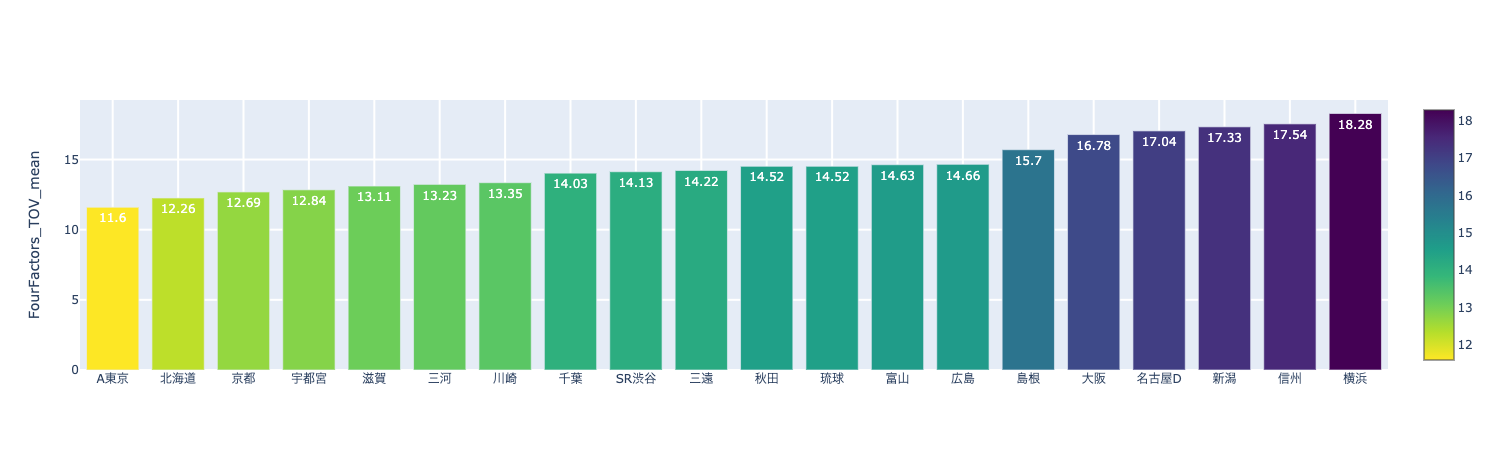

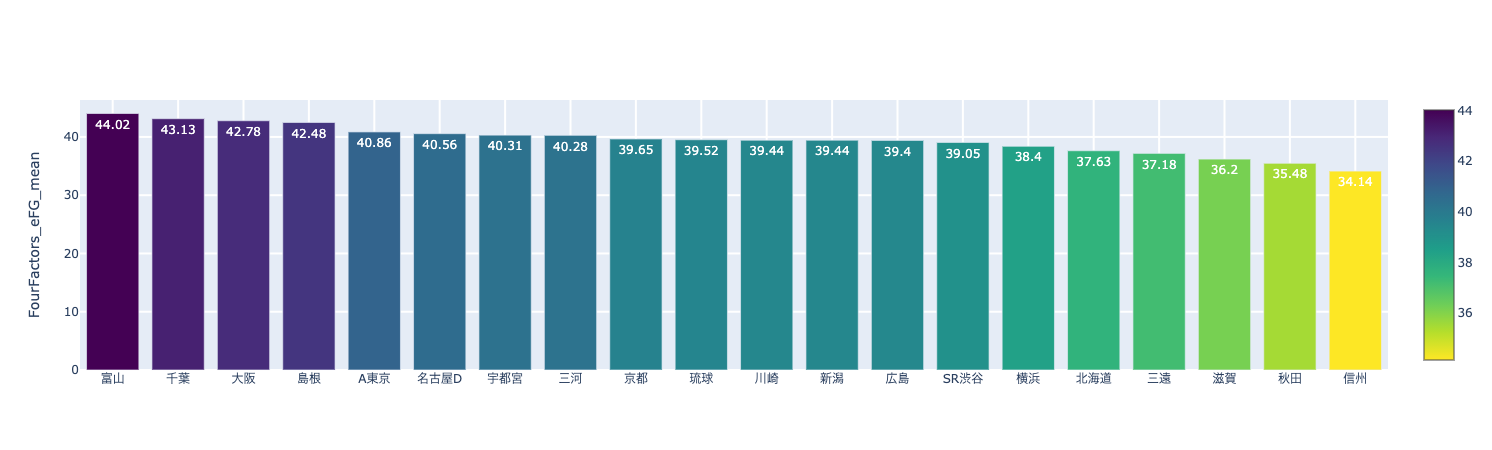

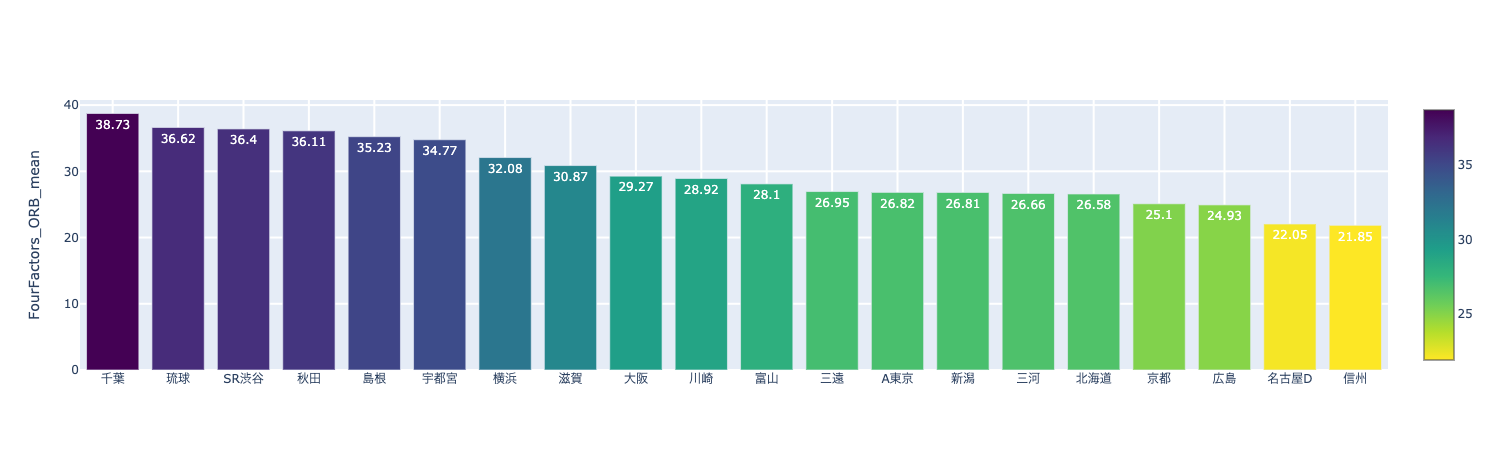

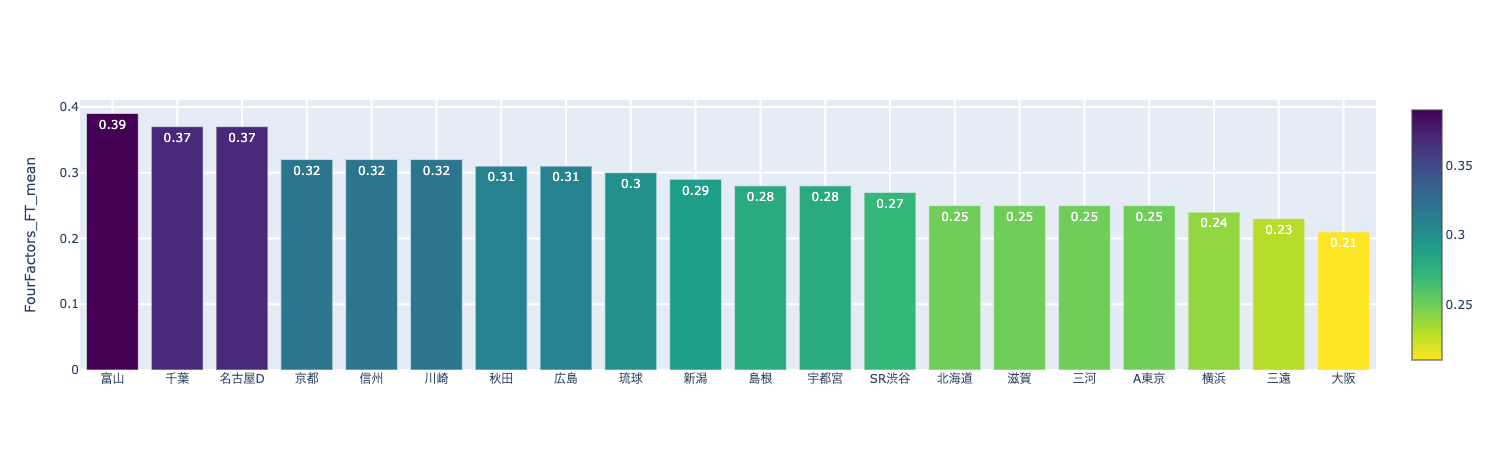

In [17]:
df_four_factors = aggregate(df_game_summary, key="NameShort", agg_dict={c: ["mean"] for c in df_game_summary.columns if c.startswith("FourFactors")})

for ycol in ["FourFactors_TOV_mean", "FourFactors_eFG_mean", "FourFactors_ORB_mean", "FourFactors_FT_mean"]:
    if ycol == "FourFactors_TOV_mean":
        BarPlotly().show(df_four_factors.sort_values(ycol, ascending=True), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")
    else:
        BarPlotly().show(df_four_factors.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")